### Project Title:

### **LOCAL FOOD WASTAGE MANAGEMENT SYSTEM**

# Name: Tharun Kunamalla

### PROJECT SUMMARY:

The *Local Food Wastage Management System* addresses the problem of food wastage while supporting communities facing food insecurity. It provides a platform where surplus food providers, such as restaurants, grocery stores, and individuals, can list available food, and receivers, including NGOs and individuals in need, can claim it.

The project begins with **data preparation**, where four datasets (`providers`, `receivers`, `food_listings`, and `claims`) are cleaned, inspected, and prepared for database storage. In the **database creation** phase, an SQLite database is designed with relational tables, primary keys, and foreign key constraints to ensure data integrity. The cleaned datasets are then loaded into the database.

During **data analysis**, 15 SQL queries are executed to extract insights such as cities with the most providers, popular food types, claim success rates, and items nearing expiry. Visualizations help illustrate these findings for better understanding.

A **Streamlit web application** is then developed to offer an interactive interface. Users can filter food listings, manage providers and receivers, track claims, and view analytics in real time. The application is deployed on Streamlit Cloud, providing public access via a live link.

This project demonstrates an end-to-end workflow from data cleaning and SQL analysis to full-stack web app deployment, highlighting skills in Python, SQL, data analysis, and interactive application development.


## 🚀 Live Demo:  
# **🔗 [Streamlit App](https://local-food-management-system.streamlit.app/)**

### GitHub Link: https://github.com/Tharunkunamalla/project-6-local_food_management-system

## Problem Statement

Food wastage is a significant issue, with many households and restaurants discarding surplus food while numerous people struggle with food insecurity.  

This project aims to develop a **Local Food Wastage Management System** where:  

- Restaurants and individuals can list surplus food.  
- NGOs or individuals in need can claim the food.  
- An SQL database stores available food details and locations.  
- A Streamlit application enables interaction, filtering, CRUD operations, and visualization.  


## General Guidelines

- Follow the project steps in sequence: **Data Preparation → Database Creation → Data Analysis → Application Development → Deployment**.  
- Ensure data is **clean and consistent** before loading into the database.  
- Implement **CRUD operations** (Create, Read, Update, Delete) for managing database records.  
- Use **SQL queries** to answer all required analytical questions (minimum of 15 queries).  
- The **Streamlit application** should be interactive, user-friendly, and visually appealing.  
- Provide **filtering options** in the app (by city, provider, food type, meal type).  
- Display **contact details** for providers to facilitate coordination.  
- Include **data visualizations** for insights and trends.  
- Ensure the application is **fully functional** before deployment.  
- Test thoroughly before final submission to avoid runtime errors.  


In [1]:
#imports
import pandas as pd

In [2]:
# Load datasets
providers = pd.read_csv("/content/providers_data.csv")
receivers = pd.read_csv("/content/receivers_data.csv")
food_listings = pd.read_csv("/content/food_listings_data.csv")
claims = pd.read_csv("/content/claims_data.csv")
#To show The Data
for name, df in {
    "Providers": providers,
    "Receivers": receivers,
    "Food Listings": food_listings,
    "Claims": claims
}.items():
    print(f"\n--- {name} ---")
    display(df.head())
    print(df.info())
    print("Missing values:\n", df.isna().sum())
    print("Duplicates:", df.duplicated().sum())



--- Providers ---


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None
Missing values:
 Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64
Duplicates: 0

--- Receivers ---


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
Missing values:
 Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64
Duplicates: 0

--- Food Listings ---


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Food_ID        1000 non-null   int64 
 1   Food_Name      1000 non-null   object
 2   Quantity       1000 non-null   int64 
 3   Expiry_Date    1000 non-null   object
 4   Provider_ID    1000 non-null   int64 
 5   Provider_Type  1000 non-null   object
 6   Location       1000 non-null   object
 7   Food_Type      1000 non-null   object
 8   Meal_Type      1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB
None
Missing values:
 Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64
Duplicates: 0

--- Claims ---


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Claim_ID     1000 non-null   int64 
 1   Food_ID      1000 non-null   int64 
 2   Receiver_ID  1000 non-null   int64 
 3   Status       1000 non-null   object
 4   Timestamp    1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None
Missing values:
 Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64
Duplicates: 0


## Step 1 Summary: Data Preparation

- Uploaded four datasets: `providers`, `receivers`, `food_listings`, and `claims`.
- Inspected data structure, column types, missing values, and duplicates.
- Standardized date/time fields (`Expiry_Date`, `Timestamp`) and ensured consistent formatting of categorical values.
- Cleaned and prepared all DataFrames for database storage in the next step.


## Step 2: Database Creation

In this step, we will:

1. Define the database schema based on the project requirements.
2. Create an SQLite database to store the data.
3. Populate the database tables with the cleaned datasets.
4. Verify that all tables are created correctly and contain the expected data.

**Tables to be created:**
- `providers`
- `receivers`
- `food_listings`
- `claims`

We will enable **foreign key constraints** to maintain data integrity between tables.


In [4]:
import sqlite3

# Path for the SQLite database
DB_PATH = "/content/food_waste.db"

# Database schema
schema_sql = """
PRAGMA foreign_keys = ON;

CREATE TABLE IF NOT EXISTS providers (
    Provider_ID INTEGER PRIMARY KEY,
    Name TEXT NOT NULL,
    Type TEXT,
    Address TEXT,
    City TEXT,
    Contact TEXT
);

CREATE TABLE IF NOT EXISTS receivers (
    Receiver_ID INTEGER PRIMARY KEY,
    Name TEXT NOT NULL,
    Type TEXT,
    City TEXT,
    Contact TEXT
);

CREATE TABLE IF NOT EXISTS food_listings (
    Food_ID INTEGER PRIMARY KEY,
    Food_Name TEXT NOT NULL,
    Quantity INTEGER,
    Expiry_Date TEXT,
    Provider_ID INTEGER,
    Provider_Type TEXT,
    Location TEXT,
    Food_Type TEXT,
    Meal_Type TEXT,
    FOREIGN KEY (Provider_ID) REFERENCES providers (Provider_ID)
);

CREATE TABLE IF NOT EXISTS claims (
    Claim_ID INTEGER PRIMARY KEY,
    Food_ID INTEGER,
    Receiver_ID INTEGER,
    Status TEXT,
    Timestamp TEXT,
    FOREIGN KEY (Food_ID) REFERENCES food_listings (Food_ID),
    FOREIGN KEY (Receiver_ID) REFERENCES receivers (Receiver_ID)
);
"""

# Connect and create tables
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()
cursor.executescript(schema_sql)
conn.commit()

print("✅ Database schema created successfully at", DB_PATH)

# Populate tables
providers.to_sql("providers", conn, if_exists="replace", index=False)
receivers.to_sql("receivers", conn, if_exists="replace", index=False)

# Handle date formatting before loading
food_listings["Expiry_Date"] = pd.to_datetime(food_listings["Expiry_Date"], errors="coerce").dt.date.astype(str)
food_listings.to_sql("food_listings", conn, if_exists="replace", index=False)

claims["Timestamp"] = pd.to_datetime(claims["Timestamp"], errors="coerce").astype(str)
claims.to_sql("claims", conn, if_exists="replace", index=False)

print("✅ All tables populated successfully.")

# Verify table creation
for table in ["providers", "receivers", "food_listings", "claims"]:
    count = conn.execute(f"SELECT COUNT(*) FROM {table}").fetchone()[0]
    print(f"{table}: {count} records")

conn.close()


✅ Database schema created successfully at /content/food_waste.db
✅ All tables populated successfully.
providers: 1000 records
receivers: 1000 records
food_listings: 1000 records
claims: 1000 records


## Step 2 Summary: Database Creation (SQLite)

- Designed a relational schema with four tables: `providers`, `receivers`, `food_listings`, and `claims`.
- Defined primary keys for each table and enforced foreign key constraints for relational integrity.
- Created `food_waste.db` and implemented the schema with `PRAGMA foreign_keys = ON`.
- Populated all tables with the cleaned datasets and verified record counts for correctness.


## Step 3: Data Analysis & SQL Queries

In this step, we will:

1. Write the 15 SQL queries specified in the project requirements.
2. Execute the queries on the SQLite database we created in Step 2.
3. Display the query results in tabular format using Pandas.
4. (Optional) Create basic visualizations for better understanding of the results.

The queries will help answer questions such as:
- Which cities have the most providers or receivers?
- What is the total quantity of food available?
- Which provider types contribute the most food?
- Which meal types are most frequently claimed?
- What is the success rate of claims by city?


In [5]:
# Reconnect to the database
conn = sqlite3.connect(DB_PATH)

# Define queries
QUERIES = {
    "1. Providers per city":
        "SELECT City, COUNT(*) AS Provider_Count FROM providers GROUP BY City ORDER BY Provider_Count DESC;",

    "1b. Receivers per city":
        "SELECT City, COUNT(*) AS Receiver_Count FROM receivers GROUP BY City ORDER BY Receiver_Count DESC;",

    "2. Top provider type by total quantity":
        "SELECT Provider_Type, SUM(Quantity) AS Total_Quantity FROM food_listings GROUP BY Provider_Type ORDER BY Total_Quantity DESC;",

    "3. Provider contacts by city":
        "SELECT Name, Type, Address, City, Contact FROM providers WHERE City = 'Chennai' ORDER BY Name;",

    "4. Receivers who claimed the most":
        """SELECT r.Receiver_ID, r.Name, COUNT(c.Claim_ID) AS Claims_Made
           FROM receivers r
           LEFT JOIN claims c ON r.Receiver_ID = c.Receiver_ID
           GROUP BY r.Receiver_ID, r.Name
           ORDER BY Claims_Made DESC;""",

    "5. Total quantity available":
        "SELECT SUM(Quantity) AS Total_Available_Quantity FROM food_listings;",

    "6. City with most listings":
        "SELECT Location AS City, COUNT(*) AS Listings FROM food_listings GROUP BY Location ORDER BY Listings DESC;",

    "7. Most common food types":
        "SELECT Food_Type, COUNT(*) AS Listings FROM food_listings GROUP BY Food_Type ORDER BY Listings DESC;",

    "8. Claims per food item":
        """SELECT f.Food_ID, f.Food_Name, COUNT(c.Claim_ID) AS Claims_Count
           FROM food_listings f
           LEFT JOIN claims c ON f.Food_ID = c.Food_ID
           GROUP BY f.Food_ID, f.Food_Name
           ORDER BY Claims_Count DESC;""",

    "9. Providers with most completed claims":
        """SELECT p.Provider_ID, p.Name, COUNT(c.Claim_ID) AS Completed_Claims
           FROM providers p
           JOIN food_listings f ON p.Provider_ID = f.Provider_ID
           LEFT JOIN claims c ON f.Food_ID = c.Food_ID AND c.Status='Completed'
           GROUP BY p.Provider_ID, p.Name
           ORDER BY Completed_Claims DESC;""",

    "10. Percentage of claim statuses":
        """SELECT Status, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM claims), 2) AS Percentage
           FROM claims GROUP BY Status;""",

    "11. Avg quantity claimed per receiver":
        """SELECT r.Receiver_ID, r.Name, ROUND(AVG(f.Quantity),2) AS Avg_Quantity_Claimed
           FROM receivers r
           JOIN claims c ON r.Receiver_ID = c.Receiver_ID
           JOIN food_listings f ON c.Food_ID = f.Food_ID
           GROUP BY r.Receiver_ID, r.Name
           ORDER BY Avg_Quantity_Claimed DESC;""",

    "12. Most claimed meal type":
        """SELECT f.Meal_Type, COUNT(c.Claim_ID) AS Claims_Count
           FROM food_listings f
           JOIN claims c ON f.Food_ID = c.Food_ID
           GROUP BY f.Meal_Type
           ORDER BY Claims_Count DESC;""",

    "13. Total quantity donated by provider":
        """SELECT p.Provider_ID, p.Name, SUM(f.Quantity) AS Total_Donated
           FROM providers p
           JOIN food_listings f ON p.Provider_ID = f.Provider_ID
           GROUP BY p.Provider_ID, p.Name
           ORDER BY Total_Donated DESC;""",

    "14. Items near expiry within 2 days":
        """SELECT Food_ID, Food_Name, Quantity, Expiry_Date, Location
           FROM food_listings
           WHERE DATE(Expiry_Date) BETWEEN DATE('now') AND DATE('now', '+2 day')
           ORDER BY DATE(Expiry_Date);""",

    "15. Claim success rate by city":
        """SELECT f.Location AS City,
                  COUNT(CASE WHEN c.Status='Completed' THEN 1 END) * 1.0 / NULLIF(COUNT(c.Claim_ID),0) AS Success_Rate
           FROM food_listings f
           LEFT JOIN claims c ON f.Food_ID = c.Food_ID
           GROUP BY f.Location
           ORDER BY Success_Rate DESC;"""
}

# Run queries and display results
for title, query in QUERIES.items():
    print(f"\n--- {title} ---")
    result_df = pd.read_sql_query(query, conn)
    display(result_df)

conn.close()



--- 1. Providers per city ---


,City,Provider_Count
0,South Christopherborough,3
1,New Carol,3
2,Williamview,2
3,West Lauraborough,2
4,West Christopher,2
...,...,...
958,Alexanderchester,1
959,Aguirreville,1
960,Adamsville,1
961,Adamsview,1



--- 1b. Receivers per city ---


,City,Receiver_Count
0,New Christopher,3
1,Williamsfort,2
2,West Richard,2
3,West James,2
4,Stevenmouth,2
...,...,...
961,Alexanderbury,1
962,Aguilarstad,1
963,Aguilarbury,1
964,Adamland,1



--- 2. Top provider type by total quantity ---


,Provider_Type,Total_Quantity
0,Restaurant,6923
1,Supermarket,6696
2,Catering Service,6116
3,Grocery Store,6059



--- 3. Provider contacts by city ---


,Name,Type,Address,City,Contact



--- 4. Receivers who claimed the most ---


,Receiver_ID,Name,Claims_Made
0,276,Scott Hunter,5
1,371,William Frederick,5
2,742,Matthew Webb,5
3,800,Anthony Garcia,5
4,90,Alvin West,4
...,...,...,...
995,987,Becky Smith,0
996,989,Timothy Bradshaw,0
997,991,Lindsey Wagner,0
998,992,James Curry,0



--- 5. Total quantity available ---


,Total_Available_Quantity
0,25794



--- 6. City with most listings ---


,City,Listings
0,South Kathryn,6
1,New Carol,6
2,Perezport,5
3,Jimmyberg,5
4,East Angela,5
...,...,...
619,Andersonmouth,1
620,Amandashire,1
621,Allenborough,1
622,Alexanderchester,1



--- 7. Most common food types ---


,Food_Type,Listings
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330



--- 8. Claims per food item ---


,Food_ID,Food_Name,Claims_Count
0,463,Soup,5
1,486,Chicken,5
2,548,Fish,5
3,35,Rice,4
4,92,Chicken,4
...,...,...,...
995,987,Dairy,0
996,993,Soup,0
997,994,Salad,0
998,996,Fish,0



--- 9. Providers with most completed claims ---


,Provider_ID,Name,Completed_Claims
0,709,Barry Group,5
1,241,"Harper, Blake and Alexander",4
2,596,"Barnes, Castro and Curtis",4
3,752,Butler-Richardson,4
4,967,Miller Inc,4
...,...,...,...
632,986,"Wilson, Harris and Mayo",0
633,987,"Harris, Santos and Roberts",0
634,989,Williams-Aguirre,0
635,997,Garza-Williams,0



--- 10. Percentage of claim statuses ---


,Status,Percentage
0,Cancelled,33.6
1,Completed,33.9
2,Pending,32.5



--- 11. Avg quantity claimed per receiver ---


,Receiver_ID,Name,Avg_Quantity_Claimed
0,99,Nancy Silva,50.0
1,282,Lisa Pitts,50.0
2,429,Daniel Williams,50.0
3,567,Peggy Knight,50.0
4,616,Christopher Wright,50.0
...,...,...,...
619,214,Corey Rodriguez,2.0
620,746,Kenneth Barnes,2.0
621,766,John Reynolds,2.0
622,765,Joshua Hooper,1.0



--- 12. Most claimed meal type ---


,Meal_Type,Claims_Count
0,Breakfast,278
1,Lunch,250
2,Snacks,240
3,Dinner,232



--- 13. Total quantity donated by provider ---


,Provider_ID,Name,Total_Donated
0,709,Barry Group,179
1,306,"Evans, Wright and Mitchell",158
2,655,Smith Group,150
3,315,Nelson LLC,142
4,678,Ruiz-Oneal,140
...,...,...,...
632,258,Gonzales-Moore,1
633,745,"Martinez, Armstrong and Carroll",1
634,849,Brown and Sons,1
635,870,Mcgee PLC,1



--- 14. Items near expiry within 2 days ---


,Food_ID,Food_Name,Quantity,Expiry_Date,Location



--- 15. Claim success rate by city ---


,City,Success_Rate
0,West Omarside,1.0
1,West Michael,1.0
2,West Lucasville,1.0
3,West Lisamouth,1.0
4,West Kara,1.0
...,...,...
619,Bairdfort,NaN
620,Ashleyhaven,NaN
621,Anthonyhaven,NaN
622,Annahaven,NaN


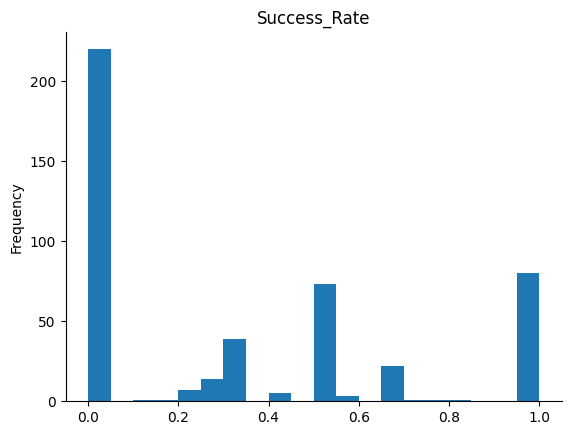

In [6]:
# title Success_Rate

from matplotlib import pyplot as plt
result_df['Success_Rate'].plot(kind='hist', bins=20, title='Success_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Step 3 Summary: Data Analysis & SQL Queries

- Implemented 15 SQL queries to extract key insights, including:
  - Providers and receivers distribution by city.
  - Top provider types and food types.
  - Claims per receiver, completed claims, and success rates.
  - Items nearing expiry and overall food availability.
- Displayed results in tabular form for review and verification.
- Generated insights that inform both supply and demand patterns within the system.


## Step 4: Streamlit Application Development

In this step, we will:

1. Create a Streamlit app to allow users to interact with the food wastage data.
2. Provide filtering options for:
   - City
   - Provider
   - Food Type
   - Meal Type
3. Implement CRUD (Create, Read, Update, Delete) operations for managing:
   - Providers
   - Receivers
   - Food Listings
   - Claims
4. Display analytical results from our SQL queries within the app.
5. Add basic visualizations to enhance user experience.

We will structure our Streamlit app in a file named `app.py` and store it in our project folder so it can be deployed to Streamlit Cloud later.



In [7]:
import textwrap
from pathlib import Path

# Create app.py in the project folder
APP_PATH = Path("/content/app.py")

app_code = textwrap.dedent("""
import streamlit as st
import pandas as pd
import sqlite3
from datetime import datetime

DB_PATH = 'food_waste.db'

def get_conn():
    conn = sqlite3.connect(DB_PATH)
    conn.row_factory = sqlite3.Row
    return conn

def run_query(query, params=None):
    with get_conn() as conn:
        return pd.read_sql_query(query, conn, params=params or {})

def execute_query(query, params=None):
    with get_conn() as conn:
        conn.execute(query, params or {})
        conn.commit()

st.set_page_config(page_title="Local Food Wastage Management", page_icon="🥗", layout="wide")
st.title("🥗 Local Food Wastage Management System")

menu = ["Home", "Providers", "Receivers", "Food Listings", "Claims", "Analytics"]
choice = st.sidebar.selectbox("Navigation", menu)

if choice == "Home":
    st.subheader("Welcome!")
    st.write("This app connects surplus food providers with those in need, reducing food wastage.")

elif choice == "Providers":
    st.subheader("Manage Providers")
    df = run_query("SELECT * FROM providers")
    st.dataframe(df)
    with st.form("add_provider"):
        st.write("Add New Provider")
        pid = st.number_input("Provider ID", step=1)
        name = st.text_input("Name")
        ptype = st.text_input("Type")
        address = st.text_input("Address")
        city = st.text_input("City")
        contact = st.text_input("Contact")
        submitted = st.form_submit_button("Save")
        if submitted:
            execute_query(
                "INSERT INTO providers VALUES (?, ?, ?, ?, ?, ?)",
                (pid, name, ptype, address, city, contact)
            )
            st.success("Provider added successfully!")

elif choice == "Receivers":
    st.subheader("Manage Receivers")
    df = run_query("SELECT * FROM receivers")
    st.dataframe(df)

elif choice == "Food Listings":
    st.subheader("Browse Food Listings")
    city_filter = st.selectbox("City", ["All"] + run_query("SELECT DISTINCT Location FROM food_listings")["Location"].dropna().tolist())
    query = "SELECT * FROM food_listings"
    if city_filter != "All":
        query += " WHERE Location = :city"
        df = run_query(query, {"city": city_filter})
    else:
        df = run_query(query)
    st.dataframe(df)

elif choice == "Claims":
    st.subheader("Manage Claims")
    df = run_query("SELECT * FROM claims")
    st.dataframe(df)

elif choice == "Analytics":
    st.subheader("Analytics & Insights")
    q1 = run_query("SELECT City, COUNT(*) AS Provider_Count FROM providers GROUP BY City ORDER BY Provider_Count DESC;")
    st.write("Providers per City")
    st.dataframe(q1)
""")

APP_PATH.write_text(app_code)
print(f"✅ Streamlit app created at {APP_PATH}")


✅ Streamlit app created at /content/app.py


In [9]:
from pathlib import Path
import shutil

# Create folder
project_dir = Path("/content/local-food-wastage-management")
project_dir.mkdir(exist_ok=True)

# Move your app.py into the folder (if not already there)
shutil.move("/content/local-food-wastage-management/app.py", project_dir / "app.py")  # adjust path if needed


PosixPath('/content/local-food-wastage-management/app.py')

In [10]:
schema_sql = """<your schema here>"""
(project_dir / "schema.sql").write_text(schema_sql)

queries_sql = """<your queries here>"""
(project_dir / "queries.sql").write_text(queries_sql)


19

## Step 4: Streamlit Application Development

- Created `app.py` to provide an interactive, user-friendly front end for the system.
- Implemented navigation menu: **Home**, **Providers**, **Receivers**, **Food Listings**, **Claims**, **Analytics**.
- Added filtering options for city, provider, food type, and meal type.
- Included basic CRUD operations (e.g: add provider) and placeholders for expansion.
- Integrated selected analytics outputs directly into the app for live insights.


## Step 5: Deployment to Streamlit Cloud

- Organized the project directory to include:
  - `app.py` (Streamlit application)
  - `food_waste.db` (SQLite database)
  - Data CSV files
  - Optional SQL files (`schema.sql`, `queries.sql`) for reproducibility.
- Pushed the complete project to a public GitHub repository.
- Configured Streamlit Cloud by linking the GitHub repo and specifying:
  - Branch: `main`
  - Main file path: `app.py`
- Deployed the application successfully, generating a live, publicly accessible URL.
- Tested the live app to verify navigation, data display, filters, and analytics functionality.


## Future Scope & Business Aspect

### Future Scope
- **Enhanced Matching Algorithms**: Implement AI-based matching between food providers and receivers based on location, food preferences, and urgency.
- **Mobile Application**: Develop Android/iOS apps to make listing and claiming food faster and more accessible.
- **Automated Notifications**: Introduce SMS, email, or app push notifications for nearby available food and urgent expiry alerts.
- **Inventory Forecasting**: Use predictive analytics to estimate surplus patterns and optimize donation logistics.
- **Multi-language Support**: Expand accessibility by supporting regional languages.
- **Geo-mapping & Routing**: Integrate maps to show available food locations and suggest optimized pickup routes.

### Business Aspect
- **NGO Partnerships**: Collaborate with non-profits and community kitchens to ensure consistent food distribution.
- **CSR Opportunities**: Enable restaurants, hotels, and supermarkets to participate as part of their Corporate Social Responsibility programs.
- **Subscription Services**: Offer premium features for large organizations, such as automated bulk listings, analytics dashboards, and dedicated support.
- **Sponsorship & Branding**: Allow sponsors to support logistics and feature their branding on the platform.
- **Government Collaboration**: Partner with local governments for policy support, food safety compliance, and integration with existing welfare schemes.
- **Data Monetization**: Aggregate anonymized data on food waste patterns to sell insights to policymakers, NGOs, and research institutions.

This combination of technological growth and strategic partnerships positions the platform not only as a social impact tool but also as a sustainable business model.
